In [1]:
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras.preprocessing.image import load_img

In [2]:
img = load_img("covid.png", target_size=(100, 100))

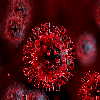

In [3]:
img

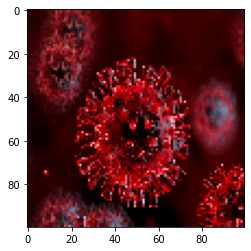

In [4]:
arr=np.array(img)
plt.imshow(arr)

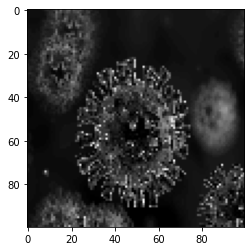

In [5]:
twodim=arr.mean(axis=2)
plt.imshow(twodim, cmap="gray")

In [6]:
flat=twodim.flatten()/255

In [7]:
population=np.random.randn(1000,*flat.shape)
population.shape

(1000, 10000)

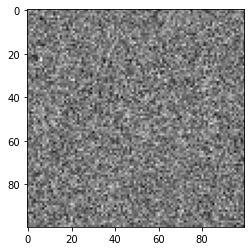

In [8]:
plt.imshow(population[100].reshape(twodim.shape), cmap='gray')

In [9]:
flat.max()

0.930718954248366

In [10]:
from tensorflow.keras.losses import MSE

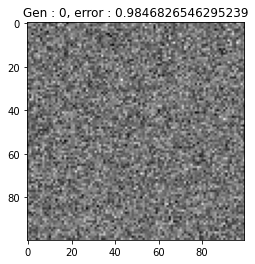

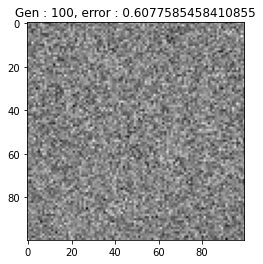

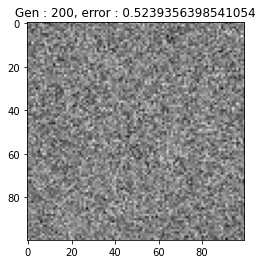

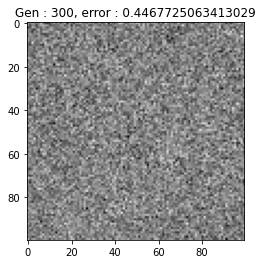

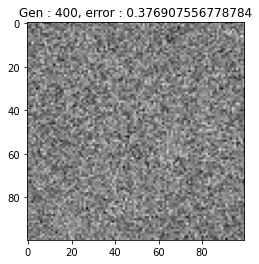

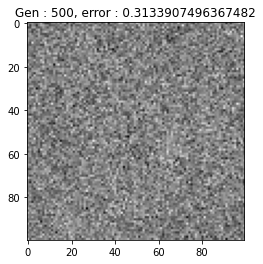

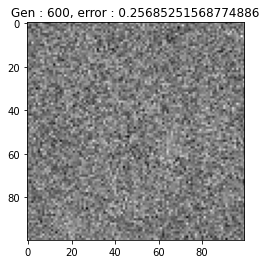

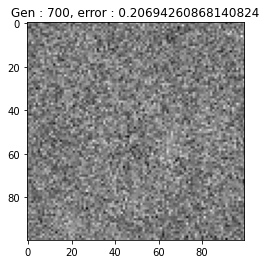

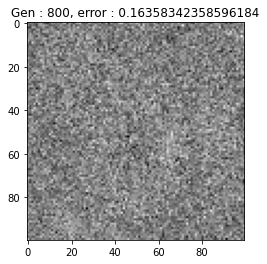

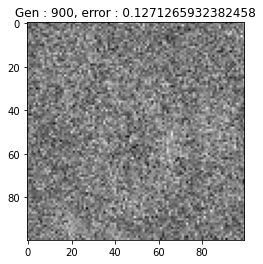

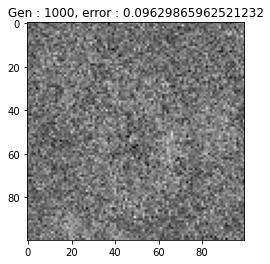

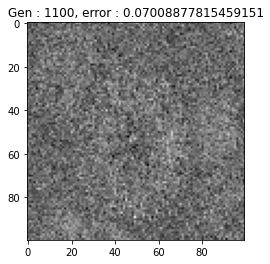

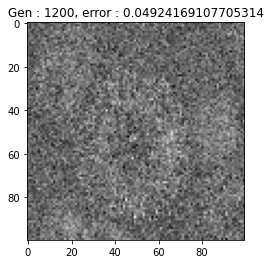

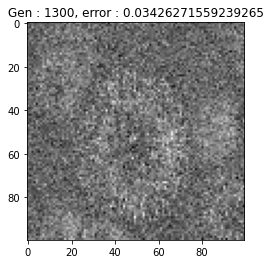

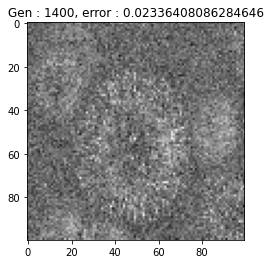

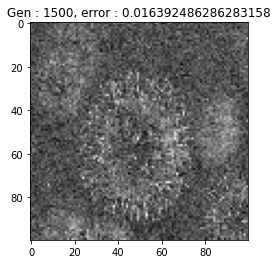

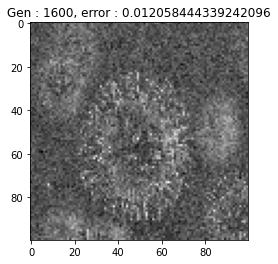

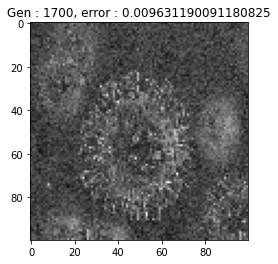

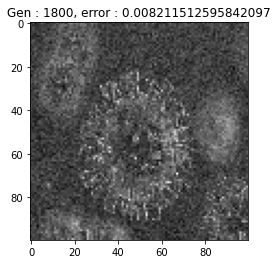

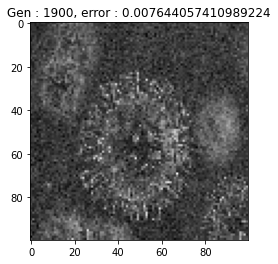

In [11]:
for generation in range(2000):
    
    errors = MSE(flat, population)

    fit_idx = np.argsort(errors)[:10]

    fit = population[fit_idx]

    first = fit[np.random.randint(0, 10, 1000)]
    second = fit[np.random.randint(0, 10, 1000)]


    first_sel = np.random.randint(0, 2, first.shape)

    second_sel = 1 - first_sel

    population = first * first_sel + second * second_sel

    population = population + np.random.randn(*population.shape) * .01
    
    if generation % 100 == 0:
        
        plt.figure()
        plt.title("Gen : {}, error : {}".format(generation, errors.numpy().min()))
        plt.imshow(fit[0].reshape(twodim.shape), cmap="gray")
        plt.show()